In [12]:
# TODO: Remove copy pasted code
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from models.models import *
from pathlib import Path


In [33]:
image_size = (224, 224)
# VGG16 - UTKFace
#architecture = VGGGender(image_size, filter_factor=585, l2_factor=1.05E-04)
#model = architecture.model
#model.load_weights('Saved models/VGG16_585_l2_1.05E-04_rotation_136_shear_1.89E+02.hdf5')

# Mobilenet - UTKFace
#architecture = MobileNetGenderFConnected(image_size, alpha=0.75, filter_factor=398, l2_factor=6.45E-04)
#model = architecture.model
#model.load_weights('Saved models/MobileNetFConnected_alpha_0.75_398_l2_6.45E-04_rotation_139_shear_2.98E+02.hdf5')

# InceptionV3 - UTKFace
architecture = InceptionGenderV3(image_size, filter_factor=447, l2_factor=7.5E-04)
model = architecture.model
model.load_weights('Saved models/InceptionV3_447_l2_7.50E-04_rotation_155_shear_3.22E+02.hdf5')


# VGG16 - Adience
#architecture = VGGGender(image_size, filter_factor=561, l2_factor=1.68E-04)
#model = architecture.model
#model.load_weights('Saved models_adience/adience_VGG16_561_l2_1.68E-04_rotation_102_shear_1.36E+02.hdf5')

# MobileNet - Adience
#architecture = MobileNetGender(image_size, alpha=1.0, filter_factor=330, l2_factor=3.99E-04)
#model = architecture.model
#model.load_weights('Saved models_adience/adience_MobileNet_alpha_1.0_330_l2_3.99E-04_rotation_121_shear_2.42E+02.hdf5')

# MobileNet - Adience
#architecture = InceptionGenderV3(image_size, filter_factor=378, l2_factor=1.94E-04)
#model = architecture.model
#model.load_weights('Saved models_adience/adience_InceptionV3_378_l2_1.94E-04_rotation_116_shear_6.06E+01.hdf5')

dataset = Path('UTKFace_Split/')
#dataset = Path('Adience_dataset')
val_test_gen = ImageDataGenerator(rescale=1./255)
test = val_test_gen.flow_from_directory(dataset / 'test',
                                        target_size=image_size,
                                        batch_size=1,
                                        class_mode='categorical', shuffle=False)


Found 1186 images belonging to 2 classes.


In [34]:
predictions = model.predict_generator(test, len(test.filenames), verbose=1)

1186/1186 [==============================] - 25s 21ms/step


In [35]:
test.labels

pred = np.argmax(predictions, 1)

In [36]:
results = np.zeros((2,2))
for ground_truth, prediction in zip(test.labels, pred):
    results[prediction, ground_truth] += 1

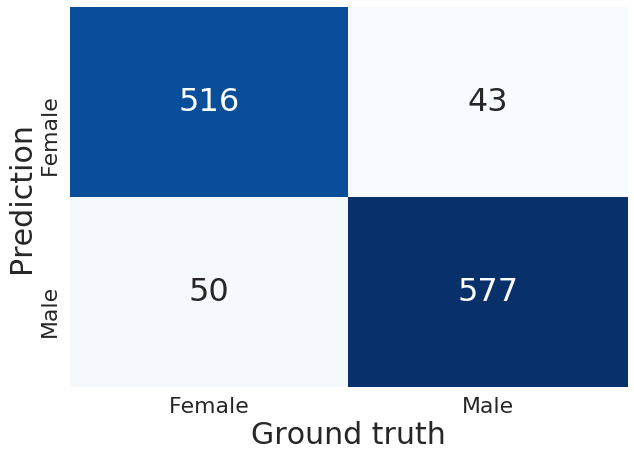

In [37]:
labels = ['Female', 'Male']
df_cm = pd.DataFrame(results, labels, labels)
plt.figure(figsize = (10,7))
sn.set(font_scale=2)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 32}, cbar=False, cmap='Blues', fmt='g')
plt.xlabel('Ground truth', fontsize=30)
plt.ylabel('Prediction', fontsize=30);
plt.savefig(f'{dataset}_{architecture.name}.png')

In [ ]:
extra = results.copy()
extra /= np.sum(results, 0)

In [ ]:
df_cm = pd.DataFrame(extra, labels, labels)
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}, cbar=False, cmap='Blues', fmt='.2%')
plt.xlabel('Ground truth')
plt.ylabel('Prediction');
plt.savefig('percentage.png')

In [ ]:
print('Accuracy: {:.2f}'.format(np.sum(np.diag(results))/np.sum(results)))

In [ ]:
wrong = []
for i, (ground_truth, prediction) in enumerate(zip(test.labels, pred)):
    if ground_truth != prediction:
        wrong.append((test.filenames[i], predictions[i]))

In [ ]:
wrong_sorted = sorted(wrong, key=lambda x:max(x[1]))

In [ ]:
wrong_sorted

In [ ]:

p = dataset / 'test'
for file, prediction in wrong_sorted:
    im = Image.open(p / file)
    plt.figure()
    plt.imshow(im)
    plt.grid(True)
    plt.xticks([])
    plt.yticks([])
    plt.title(file)

In [ ]:
correct = []
for i, (ground_truth, prediction) in enumerate(zip(test.labels, pred)):
    if ground_truth == prediction:
        correct.append((test.filenames[i], predictions[i]))
        
correct_sorted = sorted(correct, key=lambda x:max(x[1]))

In [ ]:
correct_sorted

In [ ]:
p = dataset / 'test'
for file, prediction in correct_sorted:
    im = Image.open(p / file)
    plt.figure()
    plt.imshow(im)
    plt.grid(True)
    plt.xticks([])
    plt.yticks([])
    plt.title(file)